In [1]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.6 MB/s eta 0:00:0000:0100:01


In [2]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib as mpl
from pyts.image import RecurrencePlot
import requests
import pandas as pd
import pypsr as pyps
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

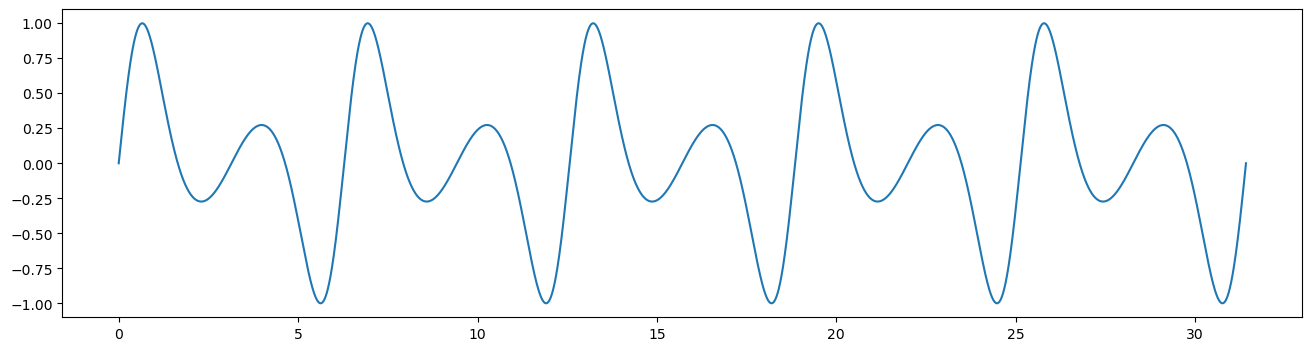

In [3]:
#Generate Periodic Signals-

time_points = np.linspace(0, 10.0 * np.pi, 5000)
a_0=1.5
x = np.sin(time_points+a_0*np.sin(time_points))


fig = plt.figure(figsize=(16, 4))
plt.plot(time_points,x)

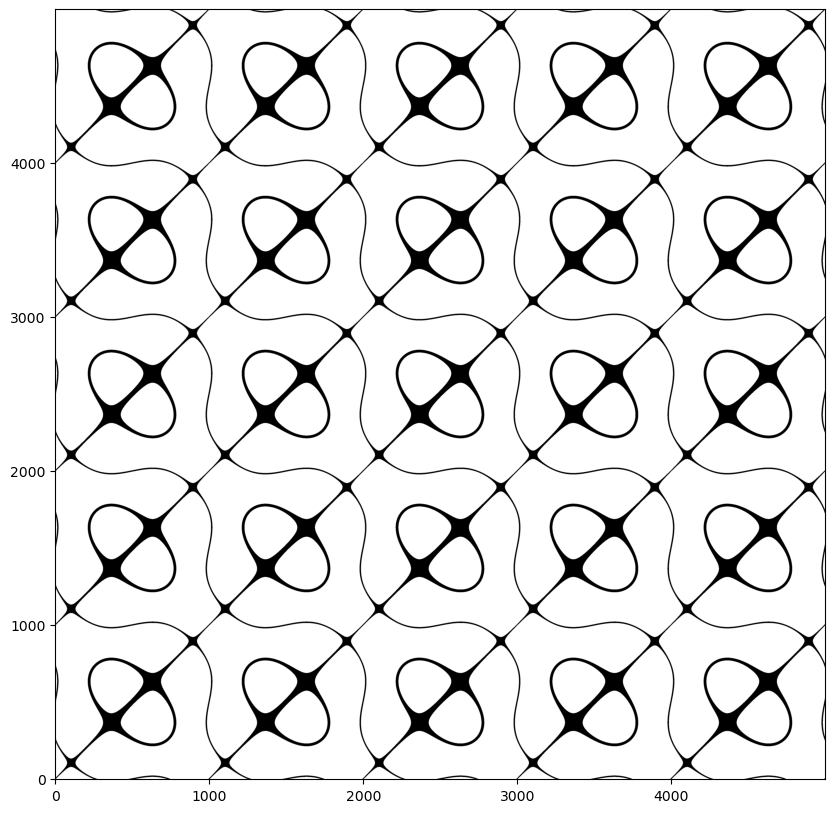

In [4]:
#RP of Periodic Signal-

rp = RecurrencePlot(dimension=1,time_delay=1,threshold='point',percentage=10)
X=np.array([x])
X_rp = rp.transform(X)

fig = plt.figure(figsize=(15, 10))
plt.imshow(X_rp[0],cmap='binary',origin='lower')

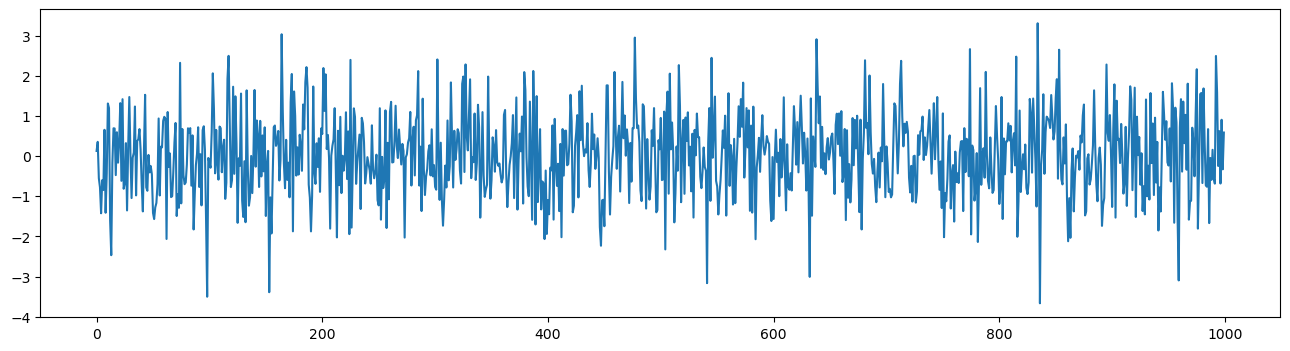

In [5]:
#Generate White Noise-

w_noise = np.random.normal(0,1.0, size=1000)

fig = plt.figure(figsize=(16, 4))
plt.plot(w_noise)

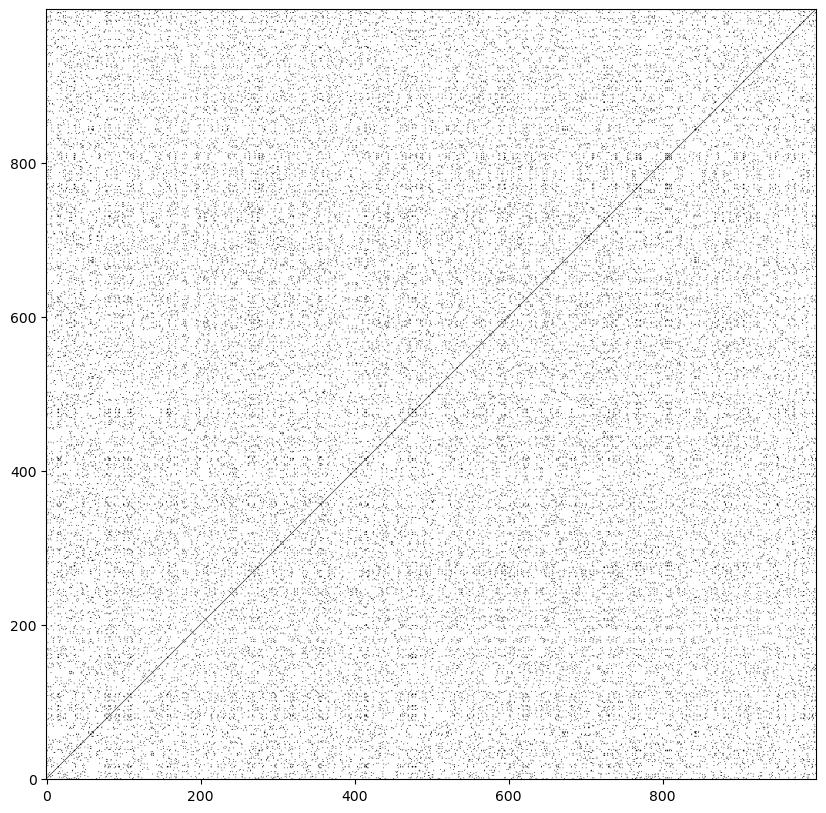

In [6]:
#RP of White Noise-

rp = RecurrencePlot(dimension=1,time_delay=1,threshold='point',percentage=5)
W_n=np.array([w_noise])
W_n_rp = rp.transform(W_n)

fig = plt.figure(figsize=(15, 10))
plt.imshow(W_n_rp[0],cmap='binary',origin='lower')

In [7]:
#Generate Discrete Chaotic Time Series (Logistic Map)-

def Logistic_Map(x,r):
  return r*x*(1.0-x)

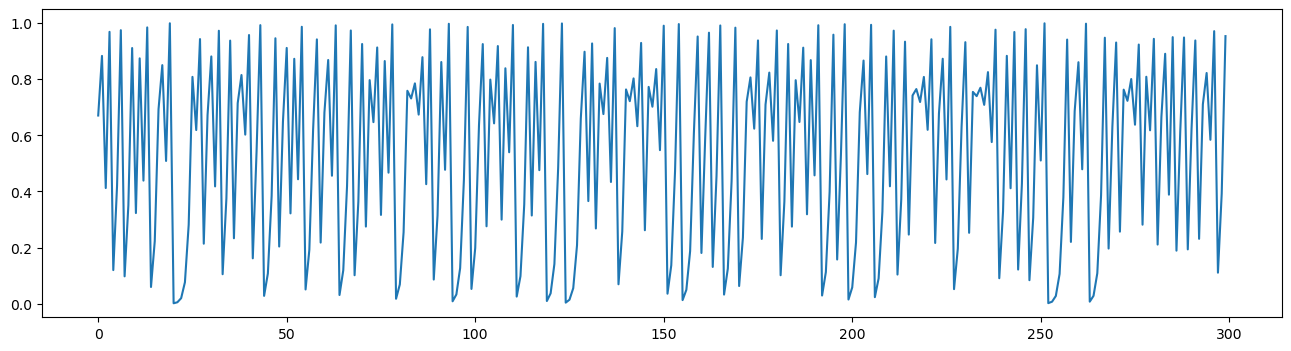

In [8]:
r=4.0;y=0.1;ts_ch=[]
for i in range(0,2000):
  y=Logistic_Map(y,r)
  ts_ch.append(y)

fig = plt.figure(figsize=(16, 4))
ts_ch_log=np.array(ts_ch[1700:])
plt.plot(ts_ch_log);

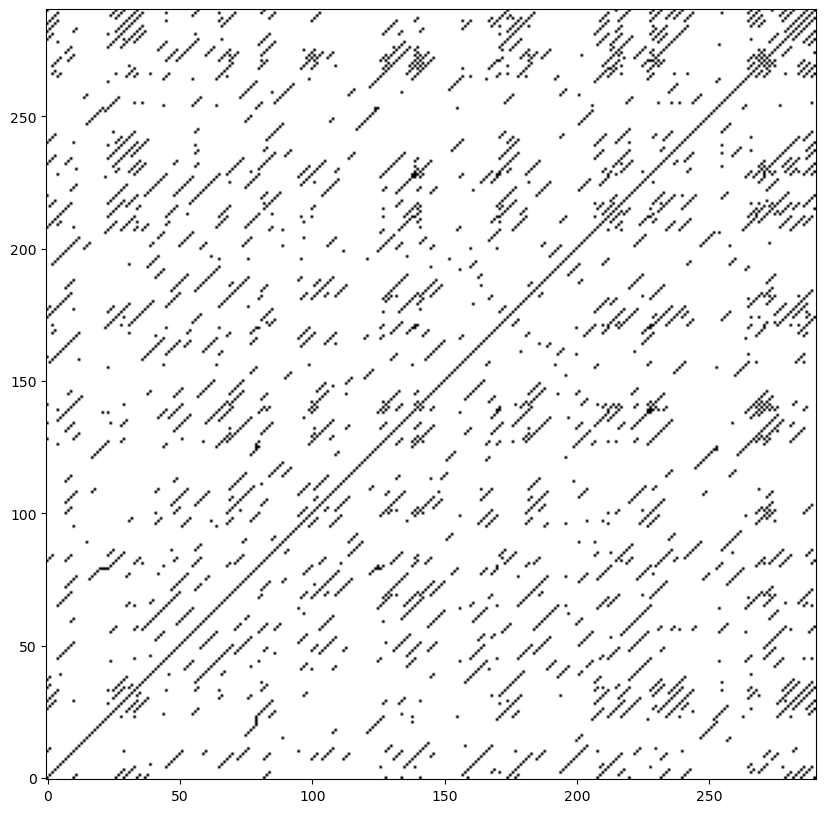

In [9]:
#RP of Logistic Map-

rp = RecurrencePlot(dimension=10,time_delay=1,threshold='point',percentage=5)
ts_ch_log_=np.array([ts_ch_log])
log_rp = rp.transform(ts_ch_log_)

fig = plt.figure(figsize=(15, 10))
plt.imshow(log_rp[0],cmap='binary',origin='lower')

In [10]:
#Using Observational Data-

data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/Sunspots-monthly.csv'
r = requests.get(data_url)
open('Sunspots-monthly.csv', 'wb').write(r.content)

124982

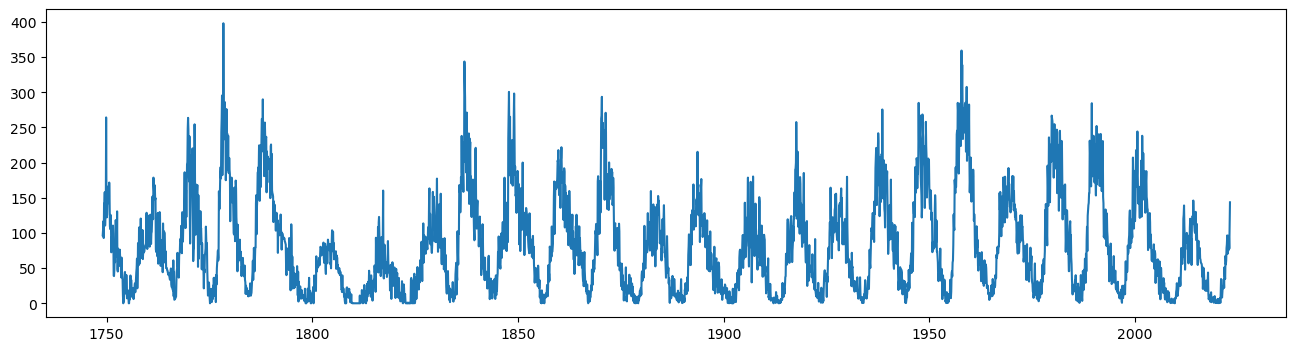

In [11]:
ts_sunspot = pd.read_csv('Sunspots-monthly.csv',header=None,delimiter=';')


fig = plt.figure(figsize=(16, 4))
plt.plot(ts_sunspot[2],ts_sunspot[3])

In [12]:
from pandas_profiling import ProfileReport

profile = ProfileReport(ts_sunspot)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Calculate Time Delay-

lag_acf=sm.tsa.stattools.acf(ts_sunspot[3], nlags=500)

m_tau_a=np.where(lag_acf<=0)[0][0]



fig = plt.figure(figsize=(15,10))

plt.axvline(x=m_tau_a, color='r', linestyle='--',lw=2)
plt.axhline(y=0.0, color='r', linestyle='--',lw=2)


plt.plot(lag_acf[:],ls = '-',lw=4,color='g');

plt.text(40,0.8,r'First zero crossing occurs at $\tau$ = %i' % (m_tau_a),fontsize=32)
plt.xlabel(r'$\tau$') 
plt.ylabel('Auto Correlation'); 

In [ ]:
#Calculate Embedding Dimension-

Phasdims=pyps.global_false_nearest_neighbors(ts_sunspot[3],32, min_dims=1, max_dims=20)


fig = plt.figure(figsize=(15,10))
plt.plot(Phasdims[0], Phasdims[1],marker='o',ms=15)
plt.axhline(y=0, color='r', linestyle='--',lw=2)
plt.ylabel('Percentage of FNN') 
plt.xlabel(r'$m$'); 

In [ ]:
#RP for Observational Data-

rp = RecurrencePlot(dimension=10,time_delay=36,threshold='point',percentage=10)


ts=np.array([ts_sunspot[3]])
ts_rp = rp.transform(ts)


fig = plt.figure(figsize=(15, 10))
plt.imshow(ts_rp[0],cmap='binary',origin='lower')

In [ ]:
#Generate Continuous Chaotic Time Series (Lorentz Attractor)-

def lorenz(Var, t, sigma, b, r):
    x, y, z = Var
    x_dot = sigma*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# Parameters
sigma, b, r = 10, 2.667, 28
#initial conditions 
Var0= [-0.75,0.25,0.1]
# time steps
t = np.linspace(0, 100, 100000)
sol = solve_ivp(lambda t, Var: lorenz(Var,t,sigma,b,r),[t[0],t[-1]],Var0,method='RK45',t_eval=t)

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(sol.y[0,15000:35000])

In [ ]:
#RP of Continuous Time Series (Lorentz Attractor)-

rp = RecurrencePlot(dimension=3,time_delay=150,threshold='point',percentage=5)
ts=np.array([sol.y[0,15000:35000]])
lor_rp = rp.transform(ts)


fig = plt.figure(figsize=(15, 10))
plt.imshow(lor_rp[0],cmap='binary',origin='lower');